In [1]:
import nglview as ng
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cd results

/mnt/e/WSL/gmx/results


In [ ]:
!printf "4\n4\n" | gmx rms -s benzene/input/em.tpr -f benzene/input/md_noPBC.xtc -o benzene/rmsd_xray.xvg -tu ns -xvg none

In [ ]:
time,rmsd = np.loadtxt("benzene/rmsd_xray.xvg", comments=["@", "#"], unpack=True)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.fill_between(time[80:],rmsd[80:], color="green", linestyle="-", alpha=0.3)

ax.plot(time,rmsd, color="black", linestyle="-")
ax.set_xlabel("Time (ns)")
ax.set_ylabel(r"C$_\alpha$ RMSD (nm)")

plt.title('Benzene\n' + 'Backbone after lst sq fit to backbone', fontsize = 10)
plt.savefig("rmsd_Benzene.png", format="png", dpi=600)
plt.show()

In [ ]:
!echo "1" | gmx gyrate -f benzene/input/md_noPBC.xtc -s benzene/input/md.tpr -o benzene/gyrate.xvg -xvg none 

In [ ]:
time, gyration, xaxis, yaxis, zaxis = np.loadtxt("benzene/gyrate.xvg", comments=["@", "#"], unpack=True)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

ax.plot(time,gyration, color="black", linestyle="-")
ax.set_xlabel("Time (ps)")
ax.set_ylabel("Rg (nm)")

plt.title('Benzene')
plt.savefig("gyration_Benzene.png", format="png", dpi=600)
plt.show()

In [ ]:
!printf "1\n4\n" | gmx trjconv -s benzene/input/md.tpr -f benzene/input/md_noPBC.xtc -o benzene/input/backbone_center.xtc -center -pbc mol

In [ ]:
!printf "4\n4\n" | gmx cluster -f benzene/input/md_noPBC.xtc -s benzene/input/md.tpr -cl benzene/central.pdb -b 800

In [ ]:
!printf "4\n" | gmx rmsf -f benzene/input/backbone_center.xtc -s benzene/central -o benzene/rmsf.xvg -res -b 800

In [ ]:
res,rmsf = np.loadtxt("benzene/rmsf.xvg", comments=["@", "#"], unpack=True)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.fill_between(res,rmsf, color="black", linestyle="-", alpha=0.3)

ax.plot(res,rmsf, color="black", linestyle="-")
ax.set_xlabel("residue")
ax.set_ylabel(r"C$_\alpha$ RMSF (nm)")

plt.title('Benzene')
plt.savefig("rmsf_Benzene.png", format="png", dpi=600)
plt.show()

In [ ]:
!printf "1\n" | gmx msd -f benzene/input/md_noPBC.xtc -s benzene/input/md.tpr -o benzene/msd.xvg -beginfit 100  -endfit 800

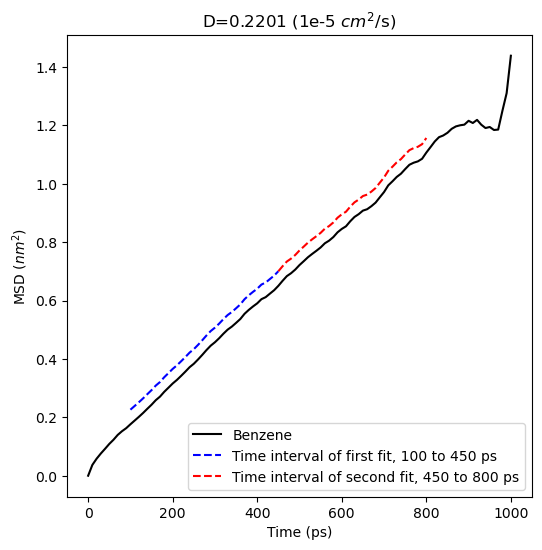

In [5]:
time,msd = np.loadtxt("benzene/msd.xvg", comments=["@", "#"], unpack=True)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

ax.plot(time,msd, color="black", linestyle="-", label="Benzene")
ax.set_xlabel("Time (ps)")
ax.set_ylabel("MSD ($nm^2$)")

time_part1 = time[10:46]
msd_part1 = msd[10:46]+0.05
ax.plot(time_part1,msd_part1, color="blue", linestyle="--", label="Time interval of first fit, 100 to 450 ps")

time_part2 = time[45:81]
msd_part2 = msd[45:81]+0.05
ax.plot(time_part2,msd_part2, color="red", linestyle="--", label="Time interval of second fit, 450 to 800 ps")


plt.title('D=0.2201 (1e-5 $cm^2$/s)') #found in the msd.xvg file
plt.legend(loc='lower right')
plt.savefig("MSD_Benzene.png", format="png", dpi=600)
plt.show()

In [ ]:
!printf "1\n" | gmx sasa -f benzene/input/md_noPBC.xtc -s benzene/input/md.tpr -o benzene/area.xvg -or benzene/area_res.xvg -b 800

In [ ]:
res,area = np.loadtxt("benzene/area.xvg", comments=["@", "#"], unpack=True)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.fill_between(res,area,y2=215, color="blue", linestyle="-", alpha=0.3)

ax.plot(res,area, color="black", linestyle="-")
ax.set_xlabel("Time (ps)")
ax.set_ylabel("Solvent Accessible Surface Area ($nm^2$)")

plt.title('Benzene')
plt.savefig("SASA_Benzene.png", format="png", dpi=600)
plt.show()

In [ ]:
res,area,standdev = np.loadtxt("benzene/area_res.xvg", comments=["@", "#"], unpack=True)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.fill_between(res,area, color="blue", linestyle="-", alpha=0.3)

ax.plot(res,area, color="black", linestyle="-")
ax.set_xlabel("Residue")
ax.set_ylabel("Solvent Accessible Surface Area ($nm^2$)")

ax.plot(res,standdev, color="red", linestyle="-")
ax.fill_between(res,standdev, color="red", linestyle="-", alpha=0.3)

plt.title('Benzene')
plt.savefig("SASA_Res_Benzene.png", format="png", dpi=600)
plt.show()